In [1]:
import pandas as pd
import hgtk, os, re
from tqdm.notebook import tqdm

### 개체명 사전 추가

In [2]:
tag_dict = {}

tag_dict['NNG-일반명사-T'] = (1780, 3533)
tag_dict['NNG-일반명사-F'] = (1780, 3534)

tag_dict['NNP-고유명사-T'] = (1786, 3545)
tag_dict['NNP-고유명사-F'] = (1786, 3546)

tag_dict['NNP-법률용어-T'] = (1786, 3545)
tag_dict['NNP-법률용어-F'] = (1786, 3546)

tag_dict['XR-어근-T'] = (2423, 3584)
tag_dict['XR-어근-F'] = (2423, 3583)

In [3]:
def add_token(token, tag_type):
    user_dict = []
    global tag_dict
    if tag_type == '일반명사':
        pos = 'NNG'
    elif tag_type == '고유명사':
        pos = 'NNP'
    elif tag_type == '어근':
        pos = 'XR'
    else:
        raise ArgError('입력된 인자에서 오류가 발생하였습니다')
    if hgtk.checker.is_hangul(token) == False:
        batchim = 'F'
    else:    
        batchim = 'F' if hgtk.letter.decompose(token[-1]) == '' else 'T' 
    tag_key = f'{pos}-{tag_type}-{batchim}'
    ltag, rtag = tag_dict[tag_key]
    tlen = len(token)
    if tlen == 1:
        cost = 3000
    elif tlen == 2:
        cost = 2500
    elif tlen == 3:
        cost = 2000
    elif tlen == 4:
        cost = 1500
    elif tlen == 5:
        cost = 1000
    else:
        cost = 500
    result = [token, ltag, rtag, cost, pos, tag_type, batchim, '*','*', '*', '*', '*']
    
    return result
    

In [4]:
df_ne = pd.read_csv('개체명사전.csv')

In [5]:
def update_dict():
    user_dict = []
    entry_list = df_ne.values
    for token, tag_type in entry_list:
        user_dict.append(add_token(token, tag_type))
    pd.DataFrame(user_dict).to_csv('../utils/mecab-ko-dic-2.1.1-20180720/user_dic.csv', index=None, header=None)
    password = 'whd2848'
    command1 = "../utils/mecab-ko-dic-2.1.1-20180720/tools/add-userdic.sh"
    command2 = "sudo make -S -C ../utils/mecab-ko-dic-2.1.1-20180720/ install" #can be any command but don't forget -S as it enables input from stdin
    assert os.system(command1) == 0, "Fail to add user_dict"
    assert os.system('echo %s | %s' % (password, command2)) == 0, "Cannot make install command" # 맥에서 잘 안됨>ubuntu에서는 가능 terminal 에서 진행
    
    print('Update done')
    return user_dict

In [6]:
update_dict() #-> 2번째 명령에 에러시 /etc/sudoers 에서 사용자명 ALL=NOPASSWD: ALL 로 변경

Update done


[['국토교통부', 1786, 3545, 1000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['경기도', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['공정거래위원회', 1786, 3545, 500, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['고양시장', 1786, 3545, 1500, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['국세청', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['국방부', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['환경부', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['산림청', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['교육부', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['경찰청', 1786, 3545, 2000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['울산광역시교육청', 1786, 3545, 500, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['전라북도', 1786, 3545, 1500, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['인천광역시', 1786, 3545, 1000, 'NNP', '고유명사', 'T', '*', '*', '*', '*', '*'],
 ['해양수산부', 1786, 3545, 1000, 'NNP', '고

In [7]:
import MeCab
mecab=MeCab.Tagger()
mecab.parse('Gtx-c 강남 갈매동 오이도연장을 강력히촉구합니다 고양 창릉,고유명사')

'Gtx\tSL,*,*,*,*,*,*,*\n-\tSY,*,*,*,*,*,*,*\nc\tSL,*,*,*,*,*,*,*\n강남\tNNP,지명,T,강남,*,*,*,*\n갈매동\tNNP,지명,T,갈매동,Compound,*,*,갈매/NNP/지명+동/NNG/*\n오이도연장\tNNP,고유명사,T,*,*,*,*,*\n을\tJKO,*,T,을,*,*,*,*\n강력히\tMAG,성분부사|양태부사,F,강력히,*,*,*,*\n촉구\tNNG,행위,F,촉구,*,*,*,*\n합니다\tXSV+EC+VCP,*,F,합니다,Inflect,XSV,VCP,하/XSV/*+ᄇ니다/EC/*+이/VCP/*\n고\tEC,*,F,고,*,*,*,*\n양\tMM,~명사,T,양,*,*,*,*\n창릉\tNNG,*,T,창릉,*,*,*,*\n,\tSC,*,*,*,*,*,*,*\n고유\tNNG,*,F,고유,*,*,*,*\n명사\tNNG,*,F,명사,*,*,*,*\nEOS\n'

### csv 파일경로

In [8]:
from glob import glob
csv_files = glob('data/results_*.csv')
csv_files[:2]

['data/results_066000_067000.csv', 'data/results_010000_011000.csv']

In [9]:
df = pd.DataFrame()
for ifile in csv_files:
    tmp_df = pd.read_csv(ifile)
    df = df.append(tmp_df)

In [10]:
len(df)

101000

In [11]:
df = df.sort_values(by='datetime').reset_index(drop=True)

In [12]:
df.head()

,title,question,answer,agency,datetime,status_code
0,차량이용 보복운전자 조치해 주세요. (대전),주행중 실선 차선에서 갑자기 끼어든 과속 차량에 조심경고 보내니 갑자기 브레이크를...,안녕하십니까 ? 귀하께서 국민신문고를 통해 신청하신 민원 에 대한 검토 결과를 다...,경찰청,2021-03-31,200
1,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200
2,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200
3,Gtx-c 노선 오이도역에 연결해 주십시오,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200
4,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200


In [13]:
df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d")

In [14]:
def parse_text(text):
    bucket = []
    start = 0
    pattern = re.compile(".*\t[A-Z]+") 
    for token, pos in  [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]:
        if start == 0:
            lspace = False
        elif text[start] == ' ':
            lspace = True
        else:
            lspace = False
        start = text.find(token, start)
        end = start + len(token)
        bucket.append((token, pos, lspace, start, end))
        start = end
    return bucket
def apply_noun_ext(df): 
    text = df['title']+ df['question']
    clean_text = re.sub('\[신문고\]|\[안녕\]', '', text)
    result = noun_ext(parse_text(clean_text))
    return result
def apply_noun_ext_answer(df): 
    text = df['answer']
    clean_text = re.sub('\[신문고\]|\[안녕\]', '', text)
    result = noun_ext(parse_text(clean_text))
    return result
def check_noun(cand):
    if len(re.findall('[^가-힣a-zA-Z0-9+]', cand)) > 0:
        return False
    else:
        return True
def noun_ext(parsed_text):
    global stopwords
    global one_list
    noun_bucket = []
    bi_bucket = []
    tri_bucket = []
    last_last_add = None
    last_add = None
    last_lspace = None
    for ichunk in parsed_text:
        token = ichunk[0]
        pos = ichunk[1]
        lspace = ichunk[2]
        add = False
        if pos == 'NNG': 
            if check_noun(token) == True: 
                if token not in stopwords:
                    if len(token) > 1: 
                        add = True
                    elif token in one_list:
                        add = True
        if pos == 'NNP': 
            if token not in stopwords:
                if len(token) > 1:
                    add = True
                elif token in one_list:
                    add = True
                    
        if add == True:
            if (last_add == True) and (lspace == False) and (len(noun_bucket) > 0):
                bi_bucket.append('|'.join([noun_bucket[-1], token]))
            if (last_add == True) and (last_last_add == True) and (lspace == False) and \
            (last_lspace == False) and (len(noun_bucket) > 1):
                tri_bucket.append('|'.join([noun_bucket[-2], noun_bucket[-1], token]))
            noun_bucket.append(token)
        last_lspace = lspace
        last_last_add = last_add
        last_add = add
    return pd.Series((noun_bucket, bi_bucket, tri_bucket))

In [15]:
one_list = list('젤펄물향색립손짱굳양톤물티밤코빛붓굿돈팩맥맛감웜집샵끈선속밖겉봄반광팁샷솔볼폼딥입펜발템갑값'
            '똥룩꿀떡존몸핏땀핫옆꽃액칠금쿨차밥병솜망폰링통옷목팔숱배살털컬홈짝뷰')

In [16]:
tqdm.pandas()

In [17]:
stopwords = ['이재준','국토','교통','행정','답변', '민원', '감사', '내용', '사항', '경우', '관련','안녕','국민신문고','검토','다음','평소','관심','애정','행복','기원','귀하']
result_df = []
df[['keywords','bigrams','trigrams']] = df[['title','question']].fillna('').progress_apply(apply_noun_ext, axis=1)

  0%|          | 0/101000 [00:00<?, ?it/s]

In [18]:
df.head()

,title,question,answer,agency,datetime,status_code,keywords,bigrams,trigrams
0,차량이용 보복운전자 조치해 주세요. (대전),주행중 실선 차선에서 갑자기 끼어든 과속 차량에 조심경고 보내니 갑자기 브레이크를...,안녕하십니까 ? 귀하께서 국민신문고를 통해 신청하신 민원 에 대한 검토 결과를 다...,경찰청,2021-03-31,200,"[차량, 이용, 보복, 운전자, 조치, 대전, 주행, 실선, 차선, 과속, 차량, ...","[차량|이용, 보복|운전자, 조심|경고, 양쪽|차선, 보복|운전]",[]
1,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[오이도연장, 촉구]",[],[]
2,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[오이도연장, 촉구]",[],[]
3,Gtx-c 노선 오이도역에 연결해 주십시오,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[노선, 오이도역, 연결]",[],[]
4,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[오이도연장, 촉구]",[],[]


In [19]:
df[['answer_keywords','answer_bigrams','answer_trigrams']] = \
                df[['answer']].fillna('').progress_apply(apply_noun_ext_answer, axis=1)

  0%|          | 0/101000 [00:00<?, ?it/s]

In [20]:
#df['answer_keywords'].iloc[0]

In [21]:
# 불용어
stopwords = ['이재준','국토','교통','행정','답변', '민원', '감사', '내용', '사항', '경우', '관련','안녕','국민신문고','검토','다음','평소','관심','애정','행복','기원','귀하']

In [22]:
df.tail()

,title,question,answer,agency,datetime,status_code,keywords,bigrams,trigrams,answer_keywords,answer_bigrams,answer_trigrams
100995,대도시권광역교통위원회는 신정차량기지의 완전 이전과 2호선 직결을 제 4차 국가철도망...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, 국가철도망, ...","[신정|차량기지, 국가철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100996,【★국토교통부 대도시권광역교통위원회는 신정차량기지의 완전 이전과 2호선 직결을 제 ...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[국토교통부, 도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, ...","[신정|차량기지, 국가철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100997,【★국토교통부 대도시권광역교통위원회는 신정차량기지의 완전 이전과 2호선 직결을 제 ...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[국토교통부, 도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, ...","[신정|차량기지, 국가철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100998,국토교통부 대도시권광역교통위원회는 신정차량기지의 완전이전과 2호선 직결을 제4차 국...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[국토교통부, 도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, ...","[신정|차량기지, 완전|이전, 철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100999,다른 품목 판매 가능여부,甲전통주 제조자가 乙전통주 제조자로부터 주류를 구입하여 甲전통주 제조자 양조장 내에...,"안녕하십니까 . 항상 국세행정에 대한 관심에 감사드리며 귀하의 민원내용은 "" 甲 ...",국세청,2021-06-09,200,"[품목, 판매, 가능, 여부, 전통주, 제조자, 전통주, 제조자, 주류, 구입, 전...",[가능|여부],[],"[국세, 전통주, 제조자, 전통주, 제조자, 주류, 구입, 전통주, 제조자, 양조장...","[국세|청장, 국세청|홈택스, 인터넷|상담]",[]


In [23]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline

font_dirs = ['./font'] # 폰트경로
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'AppleGothic'
%config InlineBackend.figure_format = 'retina'

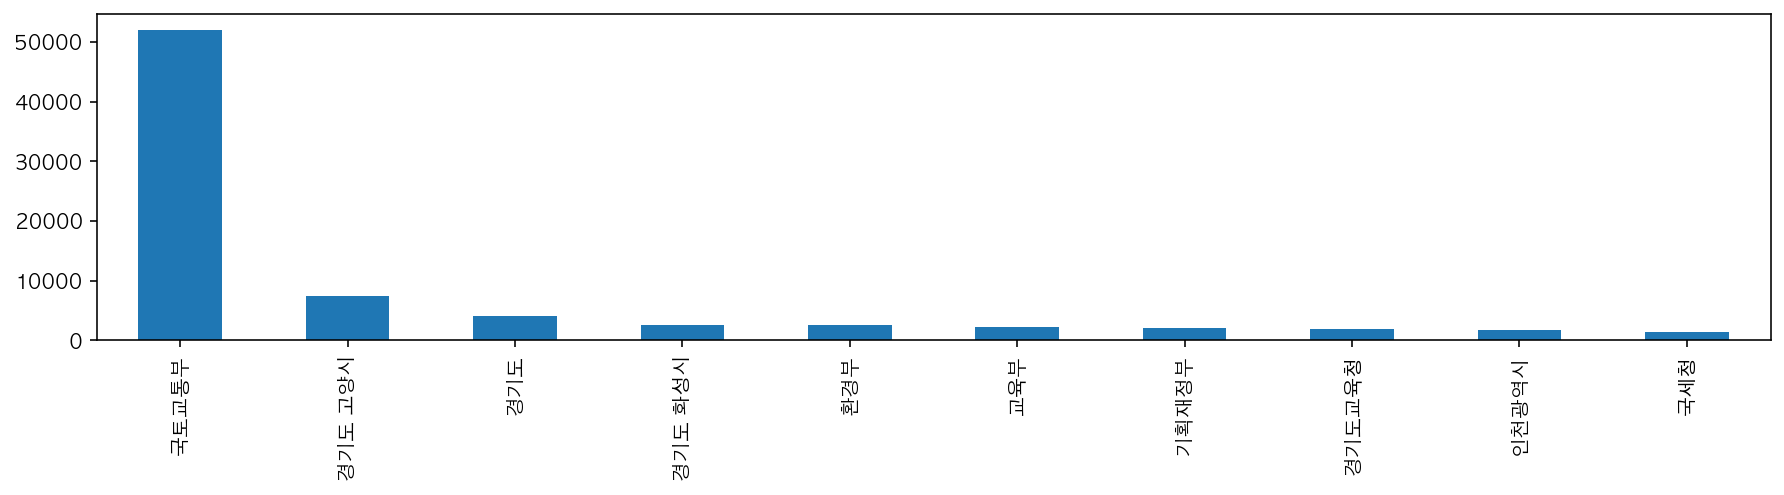

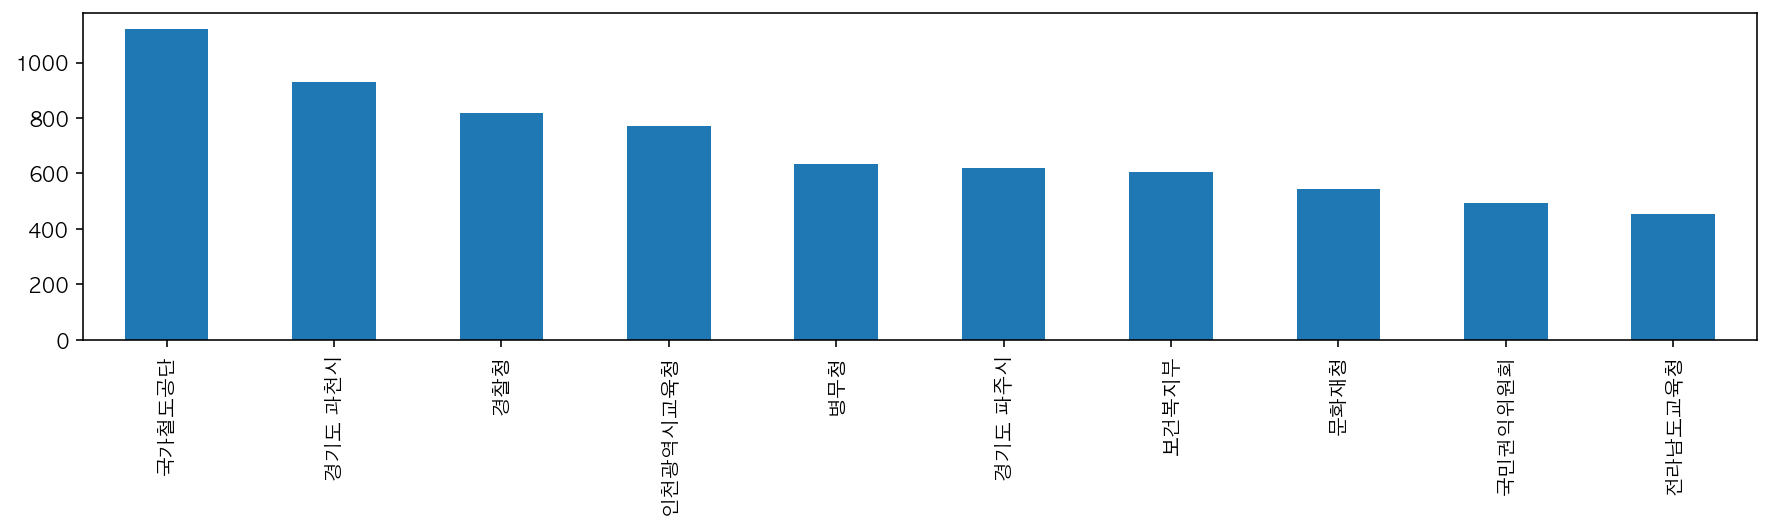

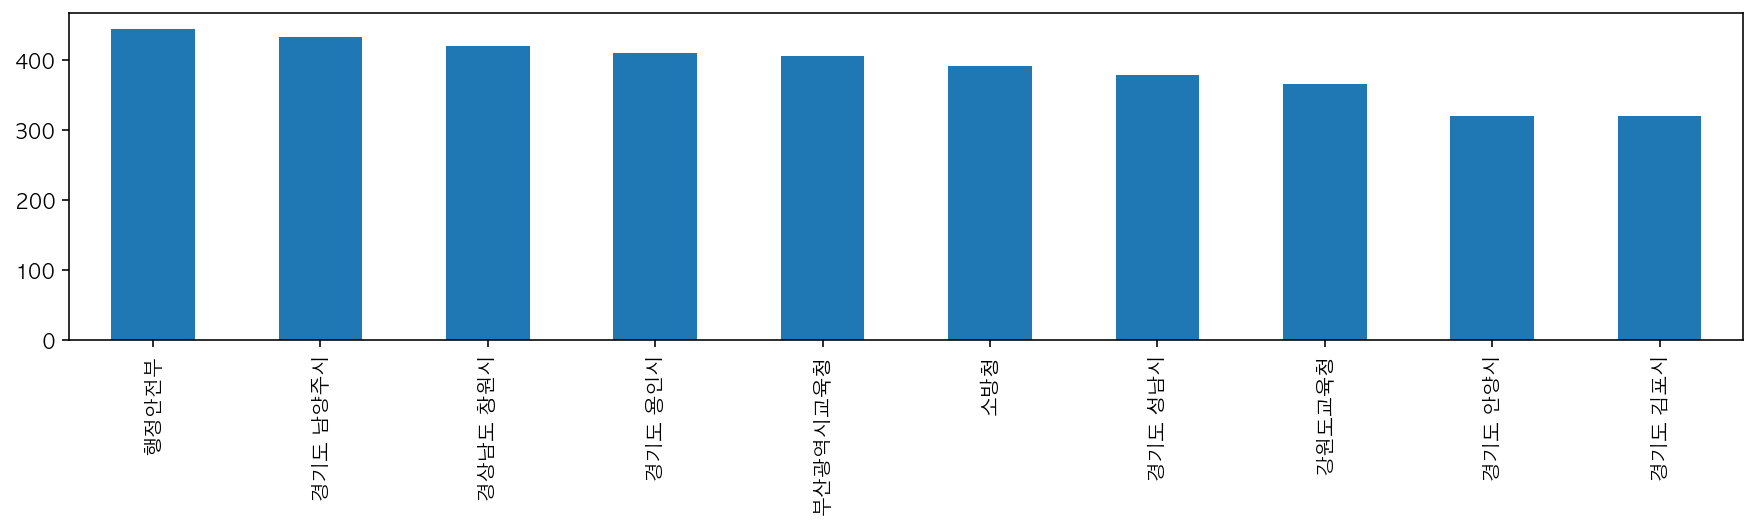

In [24]:
agency_unique = df['agency'].unique()
for i in range(0,30,10):
    df['agency'].value_counts()[i:i+10].plot.bar(figsize=(15,3))
    plt.show()


In [25]:
# 국토교통부
column =['q_keyword','q_keyword_num','q_bigram','q_bigram_num','q_trigram','q_trigram_num',
        'a_keyword','a_keyword_num','a_bigram','a_bigram_num','a_trigram','a_trigram_num']

In [26]:
from collections import Counter
for iagency in tqdm(df['agency'].unique()):
    c = Counter()
    c_b = Counter()
    c_t = Counter()
    c_a = Counter()
    c_b_a = Counter()
    c_t_a = Counter()
    for i,row in df[df['agency']==iagency].iterrows():
        keywords = row['keywords']
        bigrams = row['bigrams']
        trigrams = row['trigrams']
        c.update(keywords)
        c_b.update(bigrams)
        c_t.update(trigrams)
        keywords = row['answer_keywords']
        bigrams = row['answer_bigrams']
        trigrams = row['answer_trigrams']
        c_a.update(keywords)
        c_b_a.update(bigrams)
        c_t_a.update(trigrams)
    keywords_df = [c.most_common(1000), c_b.most_common(1000),c_t.most_common(1000),
                  c_a.most_common(1000), c_b_a.most_common(1000),c_t_a.most_common(1000)]
    keywords_df = pd.concat([pd.DataFrame(i) for i in keywords_df], axis=1)
    try:
        keywords_df.columns=column
        keywords_df.to_csv('./result/{}.csv'.format(iagency), index=False)
    except Exception:
        # 데이터가 너무 적어서, bigram, trigram이 없을때
        continue

  0%|          | 0/359 [00:00<?, ?it/s]

In [27]:
analysis_files = glob('./result/*.csv')

In [28]:
analysis_files[:2]

['./result/강원도.csv', './result/경상남도교육청.csv']

In [29]:
df[df['status_code']==200]

,title,question,answer,agency,datetime,status_code,keywords,bigrams,trigrams,answer_keywords,answer_bigrams,answer_trigrams
0,차량이용 보복운전자 조치해 주세요. (대전),주행중 실선 차선에서 갑자기 끼어든 과속 차량에 조심경고 보내니 갑자기 브레이크를...,안녕하십니까 ? 귀하께서 국민신문고를 통해 신청하신 민원 에 대한 검토 결과를 다...,경찰청,2021-03-31,200,"[차량, 이용, 보복, 운전자, 조치, 대전, 주행, 실선, 차선, 과속, 차량, ...","[차량|이용, 보복|운전자, 조심|경고, 양쪽|차선, 보복|운전]",[],"[신청, 결과, 의견, 운행, 상황, 당황, 생각, 사안, 담당, 조사, 지정, 보...","[보복|운전, 보복|운전, 안전|운전, 통고|처분, 범죄|수사]",[]
1,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[오이도연장, 촉구]",[],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
2,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[오이도연장, 촉구]",[],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
3,Gtx-c 노선 오이도역에 연결해 주십시오,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[노선, 오이도역, 연결]",[],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
4,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,2021-03-31,200,"[오이도연장, 촉구]",[],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
100995,대도시권광역교통위원회는 신정차량기지의 완전 이전과 2호선 직결을 제 4차 국가철도망...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, 국가철도망, ...","[신정|차량기지, 국가철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100996,【★국토교통부 대도시권광역교통위원회는 신정차량기지의 완전 이전과 2호선 직결을 제 ...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[국토교통부, 도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, ...","[신정|차량기지, 국가철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100997,【★국토교통부 대도시권광역교통위원회는 신정차량기지의 완전 이전과 2호선 직결을 제 ...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[국토교통부, 도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, ...","[신정|차량기지, 국가철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]
100998,국토교통부 대도시권광역교통위원회는 신정차량기지의 완전이전과 2호선 직결을 제4차 국...,,1. 평소 국토교통 행정 업무에 관심과 애정을 가져주신 점 깊이 감사드립니다. 2....,국토교통부,2021-06-09,200,"[국토교통부, 도시, 광역, 위원회, 신정, 차량기지, 완전, 이전, 선, 직결, ...","[신정|차량기지, 완전|이전, 철도망|계획]",[],"[업무, 제기, 요지, 광역, 시행, 계획, 수립, 과정, 특정, 사업, 반영, 건...","[시행|계획, 기본|계획, 시행|계획, 중앙|행정기관, 관계|기관, 시행|계획]",[]


 # 중복 제거

In [30]:
refine_df = df[['title','question','answer','agency','status_code']].drop_duplicates()

In [31]:
stopwords = ['이재준','국토','교통','행정','답변', '민원', '감사', '내용', '사항', '경우', '관련','안녕','국민신문고','검토','다음','평소','관심','애정','행복','기원','귀하']
result_df = []
refine_df[['keywords','bigrams','trigrams']] = refine_df[['title','question']].fillna('').progress_apply(apply_noun_ext, axis=1)

  0%|          | 0/35323 [00:00<?, ?it/s]

In [32]:
refine_df[['answer_keywords','answer_bigrams','answer_trigrams']] = \
                refine_df[['answer']].fillna('').progress_apply(apply_noun_ext_answer, axis=1)

  0%|          | 0/35323 [00:00<?, ?it/s]

In [33]:
refine_df.head()

,title,question,answer,agency,status_code,keywords,bigrams,trigrams,answer_keywords,answer_bigrams,answer_trigrams
0,차량이용 보복운전자 조치해 주세요. (대전),주행중 실선 차선에서 갑자기 끼어든 과속 차량에 조심경고 보내니 갑자기 브레이크를...,안녕하십니까 ? 귀하께서 국민신문고를 통해 신청하신 민원 에 대한 검토 결과를 다...,경찰청,200,"[차량, 이용, 보복, 운전자, 조치, 대전, 주행, 실선, 차선, 과속, 차량, ...","[차량|이용, 보복|운전자, 조심|경고, 양쪽|차선, 보복|운전]",[],"[신청, 결과, 의견, 운행, 상황, 당황, 생각, 사안, 담당, 조사, 지정, 보...","[보복|운전, 보복|운전, 안전|운전, 통고|처분, 범죄|수사]",[]
1,Gtx-c 오이도연장을 강력히촉구합니다,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,200,"[오이도연장, 촉구]",[],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
3,Gtx-c 노선 오이도역에 연결해 주십시오,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,200,"[노선, 오이도역, 연결]",[],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
10,GTX-C 오이도역 정차 적극추진해주십시오,,"평소 국토교통 업무에 관심과 애정을 가져주신 점에 대하여 깊은 감사를 드리며, 귀하...",국토교통부,200,"[오이도역, 정차, 적극, 추진]",[적극|추진],[],"[업무, 제출, 요지, 수도, 광역급행철도, 노선, 오이도역, 추가, 정차, 질의,...","[기본|계획, 사업|계획]",[]
32,함안군 승마공원 승마장 이용요금,함안군 승마공원 승마장 이용요금은 어떻게 되나요?,· .,경상남도 함안군,200,"[함안군, 승마, 공원, 승마, 이용, 요금, 함안군, 승마, 공원, 승마, 이용,...","[승마|공원, 이용|요금, 요금|함안군, 승마|공원, 이용|요금]",[이용|요금|함안군],[],[],[]


In [34]:
from collections import Counter
for iagency in tqdm(refine_df['agency'].unique()):
    c = Counter()
    c_b = Counter()
    c_t = Counter()
    c_a = Counter()
    c_b_a = Counter()
    c_t_a = Counter()
    for i,row in refine_df[refine_df['agency']==iagency].iterrows():
        keywords = row['keywords']
        bigrams = row['bigrams']
        trigrams = row['trigrams']
        c.update(keywords)
        c_b.update(bigrams)
        c_t.update(trigrams)
        keywords = row['answer_keywords']
        bigrams = row['answer_bigrams']
        trigrams = row['answer_trigrams']
        c_a.update(keywords)
        c_b_a.update(bigrams)
        c_t_a.update(trigrams)
    keywords_df_refine = [c.most_common(1000), c_b.most_common(1000),c_t.most_common(1000),
                  c_a.most_common(1000), c_b_a.most_common(1000),c_t_a.most_common(1000)]
    keywords_df_refine = pd.concat([pd.DataFrame(i) for i in keywords_df_refine], axis=1)
    try:
        keywords_df_refine.columns=column
        keywords_df_refine.to_csv('./result_refine/{}.csv'.format(iagency), index=False) # 저장
    except Exception:
        # 데이터가 너무 적어서, bigram, trigram이 없을때
        continue

  0%|          | 0/359 [00:00<?, ?it/s]